In [34]:
import pandas as pd
import matplotlib.pyplot as plt
#KNN 모델 import 해오기
from sklearn.neighbors import KNeighborsClassifier

# 1. 문제정의
-  500명의 키와 몸무게, 비만도 라벨을 통해서 비만을 판단하는 모델을 만들어 보자


# 2.데이터 수집
- bmi_500.csv 불러오기


In [35]:
data=pd.read_csv('bmi_500.csv',
           index_col='Label') #Lavel컬럼 인덱스로 만들기
data.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [36]:
# 인덱서를 사용해서
# 인덱서 : 데이터 프레임에서 행/열 단위로 데이터를 불러오기
# loc인덱서:[행,열] 행과, 열에 대한 이름 data.loc['Overewight','height']
# iloc인덱서:[행,열] 행과, 열에대한 번호 data.iloc[3,1]
#label 이 nomal 인것만 출력하기
data.loc['Normal',:]

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


# 3.데이터 전처리

In [37]:
# .info : 결측치, 데이터 타입 확인 해주는 함수
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [38]:
# .describe()  기술통계, 이상치의 여부를 확인 하는 함수
    #이상치 제일큰값(max)과 제일작은값(min) 중에 있음, 범위 외의 값
    # 간격을 확인 간격이 비정상적으로 크면 이상치가 있다는 의미
# 수치형 컬럼에 대해서 
data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


# 4.탐색적 데이터 분석(EDA)
-  각 비만도 등급별로시각화

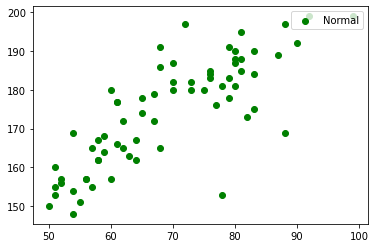

In [39]:
# normal 만 시각화
data_normal= data.loc['Normal',:]
plt.scatter(data_normal['Weight'], # X축 데이터
           data_normal['Height'], #y축 데이터
           c='green',
           label='Normal')

plt.legend(loc ='upper right') # label을 띄워주는 함수
plt.show()

In [40]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [41]:
# def 함수 만들기
    # 하나의 셀에있는 글자를 한번에 바꾸는 기능 ESC +f
    
def drawScatter(label,color):
    data_sactter= data.loc[label]
    plt.scatter(data_sactter['Weight'], # X축 데이터
               data_sactter['Height'], #y축 데이터
               c=color,
               label=label)
    


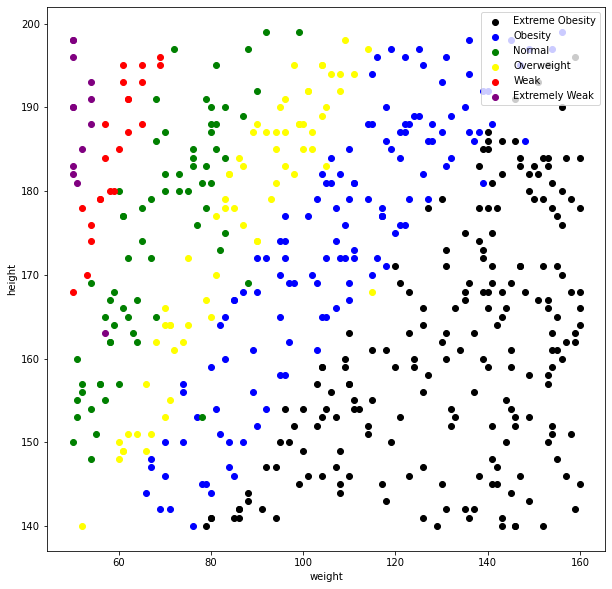

In [42]:
#Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 
# 'Weak','Extremely Weak'

#스캐터 차트 : 하나하나 누적되어 추가 된다.
plt.figure(figsize=(10,10)) #그래프 크기

#함수 적용
drawScatter('Extreme Obesity','black')
drawScatter('Obesity','blue')
drawScatter('Normal','green')
drawScatter('Overweight','yellow')
drawScatter('Weak','red')
drawScatter('Extremely Weak','purple')

plt.legend(loc='upper right')
plt.xlabel('weight') #x축 이름
plt.ylabel('height') #y축 이름
plt.show()


# 5. 모델선택 및 하이퍼 파라미터 튜닝
- 문제/ 정답 ,훈련/평가로 데이터 나누기
- KNN 모델 사용

In [43]:
#  문제(X)/ 정답(y)
data = pd.read_csv('bmi_500.csv')

X=data.loc[:,'Height':'Weight']
y= data.loc[:,"Label"]
data

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [44]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [45]:
# 훈련/평가
# 70 /  30
# 350 / 150

X_train=X.iloc[ :350, : ]
X_test=X.iloc [ 350: , : ]
y_train=y.iloc[ :350]
y_test=y.iloc[350: ]


In [46]:
# KNN 모델 사용
knn= KNeighborsClassifier(n_neighbors=7)

# 6.학습


In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

# 7.평가

In [48]:
print('train_score:',knn.score(X_train,y_train))
print('test_score:',knn.score(X_test,y_test))

train_score: 0.9028571428571428
test_score: 0.9


In [49]:
knn.predict([[174,67],[180,80]])

array(['Normal', 'Overweight'], dtype=object)

In [ ]:
# Train 의 비율을 높일때
# : 기존 데이터로 규칙을 찾았는데 조금 부족할때
# : 규칙을 조금 더 세셋하게 찾고 싶다
# *test 의 비율이 낮아지므로 test score에 대해서 신뢰도가 낮아짐

# Test의 비율을 높일때 
# :Test score 의 신뢰도를 높이고 싶을때
# * Train 의 비율이 낮아지므로 규칙을 조금 덜 세세하게 찾게됨